# Pràctica 1: Resolem un problema de classificacio

### Integrants 

|   NOM                      | Arnau Muñoz Barrera     | José Ortín López           | Lucas Aviñó Roig           | Albert Vacas Martínez
| -------------------------- | ----------------------- | -------------------------- | -------------------------- | --------------------------
|   NIU                      | 1665982                 | 1667573                    | 1566876                    | 1665473


## 1. EDA (exploratory data analysis)
Com a primer pas, caldrà que importem totes les llibreries i utilitats que farem servir en el desenvolupament de la pràctica:

In [1]:
%pip install pandas seaborn scikit-learn category_encoders scikit-optimize scipy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import gist_heat_r
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import *

from category_encoders.ordinal import OrdinalEncoder
from sklearn.decomposition import PCA
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

from scipy.stats import entropy

pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

plt.rcParams['figure.dpi'] = 80

import warnings
warnings.simplefilter(action='ignore')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv('titanic/train.csv', header=0, delimiter=',')
y = df["Survived"]
X = df.drop("Survived", axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)


## Objectius

Els objectius d’aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificació, tècniques d’emplenament de valors perduts i validació creuada.

* Comparar diferents models de classificació.

* Realitzar la cerca d’hiperparàmetres.

* Entendre i implementar la validació creuada.

* Analitzar detalladament els resultats obtinguts durant l’entrenament dels diferents models.

Aquesta pràctica és prèvia al cas Kaggle que realitzareu durant la segona part de l’assignatura. En aquesta primera fase les preguntes estan definides, però us ha de servir d’aprenentatge per saber com estructurar un projecte d’aprenentatge automàtic, ja que en el cas Kaggle no tindreu les preguntes pautades.

## Bases de dades
En aquesta pràctica farem servir la base de dades del *Titanic*. L’atribut a predir és *Survived*, que indica si cada passatger va sobreviure o no.

[Enllaç a les dades](https://www.kaggle.com/c/titanic/data)

## Treball en grup

La pràctica es durà a terme en grups de 2 o 3 persones. En casos excepcionals i degudament justificats, es podrà realitzar de manera individual.

## Seguiment i entrega de la pràctica

A la Pràctica 1 es proposen diverses tasques per fer una comparació adequada dels resultats obtinguts amb diferents mètodes de classificació aplicats a una mateixa base de dades.

Es realitzaran sessions de seguiment del treball, orientades a resoldre dubtes sobre les dades, aclarir els objectius de cada apartat de l’enunciat i comentar els resultats obtinguts durant l’anàlisi. És molt recomanable assistir-hi amb el treball ja avançat per tal de poder aprofitar millor la sessió.

Pel que fa a l’entrega, caldrà lliurar a través de Caronte el següent:

1. *Memòria* en format PDF o en la mateixa notebook, explicant els resultats obtinguts sobre la base de dades i incloent el codi en Python corresponent. Aquesta nota serà la mateixa per a tots els membres del grup. (9 punts)

2. *Presentació* amb els resultats (màxim 4 minuts). Aquesta nota serà individual. (1 punt)

*Nota*: En cas d’entregar la memòria en format PDF, cal adjuntar el codi en Python per separat. Si s’entrega en format notebook, aquest mateix document ja servirà com a codi.


# Continguts que s’avaluaran en la pràctica

1. **EDA (Exploratory Data Analysis)** – 1 punt

* Anàlisi de la mida i tipologia de les dades (0.25 pts)

* Primera valoració de correlacions (0.5 pts)

* Anàlisi de l’atribut target (0.25 pts)

2. **Preprocessament** – 2 punts

* Eliminació de valors nuls (0.5 pts)

* Codificació de variables categòriques (0.75 pts)

* Altres (PCA, normalització, etc.) (0.75 pts)

3. **Selecció de mètriques** – 1.5 punts

* Selecció de la mètrica més adequada pel problema (0.75 pts)

* Visualització de corbes ROC/AUC (0.75 pts)

4. **Selecció de models amb validació creuada** – 4 punts

* Selecció del millor model (2 pts)

* Cerca d’hiperparàmetres (2 pts)

5. **Anàlisi final** – 1.5 punts

Cal tenir en compte que les puntuacions dins de cada apartat són orientatives. La pràctica està estructurada a partir d’un seguit de preguntes guia en cada secció, relacionades amb els continguts avaluables. **No cal respondre-les totes**: el seu objectiu és ajudar-vos a reflexionar i aprofundir en els aspectes clau de cada apartat. Tot i així, és recomanable llegir-les prèviament i tenir-les en compte durant el desenvolupament de la pràctica.

**IMPORTANT**: El criteri principal d’avaluació serà la capacitat de mantenir una narrativa coherent a mesura que es presenten els resultats. No es penalitzarà deixar alguna pregunta sense respondre, sempre que el procés seguit i les conclusions extretes a partir dels resultats siguin consistents i ben fonamentats.

### 1. EDA (*Exploratory Data Analysis*) – **1 punt**

Abans de començar, cal fer un anàlisi de la base de dades i la seva estructura interna:  

In [3]:
df = pd.read_csv('titanic/train.csv')
print("Estructura Interna del dataframe: ", df.shape)

# View complete dataframe with print(df)
print(df.head(5))

Estructura Interna del dataframe:  (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex     Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.0000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.0000      1   
2                             Heikkinen, Miss. Laina  female 26.0000      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.0000      1   
4                           Allen, Mr. William Henry    male 35.0000      0   

   Parch            Ticket    Fare Cabin Embarked  
0      0         A/5 21171  7.2500   NaN        S  
1      0          PC 17599 71.2833   C85        C  
2      0  STON/O2. 3101282  7.9250   NaN        S  
3      0            113803 53.1000  C123        S  
4  

**Preguntes:**  
-  **Quants atributs té la base de dades?**  


In [4]:
# La base de dades té aquests atributs:
print('La nostra base de dades té',df.shape[1], 'atributs')

La nostra base de dades té 12 atributs


* **Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)**

    Veient manualment el dataset assignat, podem veure com Kaggle ens ofereix uan descripció per a cada atribut. Addicionalment, afegim el tipus per cadascún:
    
    | Variable	   |Definition                                          |Key                                             | Type      |
    |--------------|----------------------------------------------------|------------------------------------------------|-----------|
    | PassangerId  | Identification of the passenger                    |                                                | Numeric   |
    | Survived     | Survival                                           | 0 = No, 1 = Yes                                | Binary    |
    | Pclass       | Ticket class                                       | 1 = 1st, 2 = 2nd, 3 = 3rd                      | Categoric |
    | Name         | Name of the passenger                              |                                                | Categoric |
    | Sex          | Sex                                                |                                                | Categoric |
    | Age          | Age in years                                       |                                                | Numeric   |
    | SibSp        | # of siblings / spouses aboard the Titanic         |                                                | Numeric   |
    | Parch        | # of parents / children aboard the Titanic         |                                                | Numeric   |
    | Ticket       | Ticket number                                      |                                                | Categoric |
    | Fare         | Passenger fare                                     |                                                | Numeric   |
    | Cabin        | Cabin number                                       |                                                | Categoric |
    | Embarked     | Port of Embarkation                                | C = Cherbourg, Q = Queenstown, S = Southampton | Categoric |

In [5]:
print("Columns: ")
print(df.dtypes) 

bin_cols = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]   


Columns: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


-  **Com és el *target*? Quantes categories diferents té?**  

    Com s'esmenta a l'enunciat, el nostre target és el camp ```Survived```, que és del tipus binari. Concloent, el **field** té dos valors possibles, on les categories depenent dels valors que pot adoptar que es pot extraure són: 
    
    0 = No (No sobreviu), 1 = Yes (Sí sobreviu)

-  **Hi ha valors nuls (*NaNs*) a les dades?**  

    Per tal de poder saber-ho, mirem quin percentatge de NaNs tenim a cada un dels atributs:

In [6]:
percent_nan_col = df.isna().mean(axis = 0)
percent_nan_col

PassengerId   0.0000
Survived      0.0000
Pclass        0.0000
Name          0.0000
Sex           0.0000
Age           0.1987
SibSp         0.0000
Parch         0.0000
Ticket        0.0000
Fare          0.0000
Cabin         0.7710
Embarked      0.0022
dtype: float64

Amb la mostra dels percentatges de NaNs, podem veure com els atributs ```Age```, ```Cabin``` i ```Embarked``` tenen la major quantitat de valors nuls. Més concretament , el paràmetre ```Cabin``` és l'atribut que més valors nuls té (situat amb un 77.1%), seguit d'```Age``` (uns 19.9%) i finalment ```Embarked``` (uns 0.2%).


-  **Es poden observar correlacions entre les variables explicatives (*X*) i la variable objectiu (*y*)?**
Fent de les llibreries importades a l'inici, podrem fer la representació de la correlació entre els diferents atributs de X i el target (y) fent-ho de dues maneres, amb gràfics de punts i amb una matriu de correlació (heatmap).

 ⚠️ **WARNING** ⚠️ Només podrem fer l'anàlisi de les correlacions d'aquells atributs que són numèrics i, per tant, les variables categòriques necessitaràn ser codificades per a poder valorar-ne la correlació.  

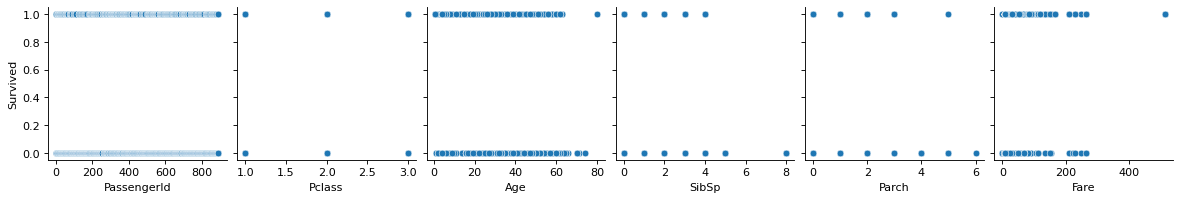

In [7]:
g= sns.pairplot(df,y_vars=['Survived'], x_vars=df.select_dtypes(include='number').columns.drop('Survived'), dropna=True)

Observem que, a primera vista, no veiem cap correlació visible entre els atributs de ```X``` i els valors de ```y```, ja que els punts es distribueixen igual en **l'eix x**

<Axes: >

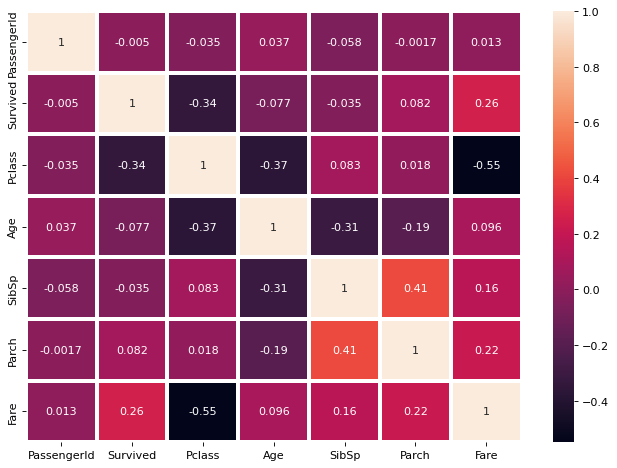

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths=2)

Però, amb l'anàlisi d'un gràfic de calor, veiem que, efectivament, la majoria d'atributs no té gaire correlació amb el target ```y```, ja que els valors són propers a $0$. 

Encara que, els dos atributs amb més correlació són _Pclass_, amb una correlació negativa de $-0.34$, i _Fare_, amb una correlació positiva de $0.26$.

Finalment, veiem que aquests dos atributs són els que tenen una major correlació entre ells (negativa de $-0.55$), fet comprensible a nivell no tant tècnic, on fet un pensament més sencill, arrivem a pensar ¡ que els passatges d'una classe més rica (un valor de _Pclass_ menor) acabaran tenint una major despesa durant el viatge (_Fare_), ja que disposen de més recursos dels que fer recursos.

-  **Les etiquetes estan balancejades? (és a dir, hi ha una distribució similar entre categories?) Creus que la seva distribució pot afectar la classificació?**

    Per tal de comprovar com de ben distribuïts estan els valors dins de cada atribut, calcularem l'entropia per cada camp. 
    
    Alhora, per poder comparar-los i valorar-los correctament, normalitzarem el resultat entre $0$ i $1$ caldrà dividir-lo per l'entropia màxima de cada columna.

In [9]:
entropias = df.apply(lambda col: entropy(col.value_counts(normalize=True), base=2)/np.log2(col.nunique()))
entropias

PassengerId   1.0000
Survived      0.9607
Pclass        0.9081
Name          1.0000
Sex           0.9362
Age           0.9036
SibSp         0.4768
Parch         0.4019
Ticket        0.9810
Fare          0.8854
Cabin         0.9814
Embarked      0.6920
dtype: float64

Posterior als càlculs, veiem que l'entropia a l'atribut target (*Survived*) és propera a $1$, pel que ens deixa el pensament de que el dataset complet està força balancejat respecte a les classes del nostre problema.

Respecte la resta d'atributs, veiem que totes les etiquetes tenen una entropia propera a 1 excepte els **fields** _SibSp_, _Parch_ i _Embarked_. Fet que no ens sorpren degut a la alta correlació entre atributs càlculada anteriorment.

### 2. Preprocessament (*normalització, tractament d’outliers, selecció de variables...*) – **2 punts**

Ara, havent conegut les dades disponibles, caldrà preparar-les i adaptar-les pels algoritmes d’aprenentatge. 

Segons la tipologia de les dades, es poden filtrar atributs, aplicar reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar, o bé detectar i eliminar *outliers*.  

Consulteu la [documentació de *scikit-learn* sobre preprocessament](https://scikit-learn.org/stable/modules/preprocessing.html) per explorar les diferents opcions que ofereix.  

**Preguntes:**  
-  **Les dades estan normalitzades? Caldria fer-ho?**

    No, les dades no estan normalitzades, és a dir, que cada atribut té un rang de valors diferent. 
    
    Seria recomanable normalitzar, ja que, si no ho fem, els atributs amb valors més grans tindran un pes superior durant l'entrenament del model, afectant el seu rendiment.

-  **En cas de normalitzar, quin tipus de normalització seria més adient per a les vostres dades?**
Pensem que la millor és la ```MinMaxScaler```, on el que es fa és normalitzar els valors situant-los dins del rang $[0,1]$ aplicant el següent càlcul: 

    $X_{normalitzat}=\frac{X-X_{min}}{X_{max}-X_{min}}$.    Això ens permetrà mapejar les dades al mateix rang.  


-  **Hi ha moltes dades sense informació (*NaNs*)? Tingueu en compte que alguns mètodes no les toleren durant l’aprenentatge.**  
   -  **Com afecta la classificació si les filtreu?**  
   -  **I si les reompliu? Com ho faríeu? [Pista](https://scikit-learn.org/stable/modules/impute.html)**

   Veiem que tenim molts nans a la columna **Cabin** amb un percentatge de $0.771$, i alguns a les columnes **Age** ($0.199$), **Embarked** ($0.002$).

   Com que la gran quantitat de *NaNs* fa que es redueixi la qualitat de l'entrenament, poden introduïr de manera o no intencionada biaixos o sobretot, suposar una reducció de la mida efectiva del conjunt de valors d'entrenament caldrà aplicar certs filtrats i manipulacions.

   * En primer lloc, degut al gran percentatge de NaNs, eliminarem **Cabin** directament.

   * En segon lloc, pensem que, degut al baix percentatge, ens aporta més valor eliminar les files que tinguin un NaN a la columna **Embarked**. 
   * Finalment, creiem que la millor opció és emplenar els NaNs restants de l'atribut numèric **Age**, mitjançant la mitjana aritmètica de la columna.

   Aquest tractament que farem, considerem que és el que afectarà negativament en menor mesura al rendiment del model, fins i tot, suposant una millora.  


-  **Hi ha dades categòriques? Quina seria la codificació més adequada?**
    
    Sí, si que hi ha dades categòriques i són les següents: **Pclass**, **Name**, **Sex**, **Ticket**, **Cabin** i **Embarked**  

    Per les dades trobades, creiem que la codificació amb més sentit és l'```OrdinalEncoder```, ja que s'atribueix un valor numèric a cada categoria a tractar que tinguem per cada característica que tingui. És a dor, per exemple, en el cas del paràmetre *Sex*, se li podrà assignar el valor $0$ o $1$, ja que només tindrà dues possibilitats (*Male* i *Female*).

-  **Es poden extreure atributs addicionals a partir de les variables categòriques (per exemple, aplicant alguna regla sobre el text)?**

    Sí,a través de l'atribut *Name* podem extraure la informació sobre l'**Estat Civil** de cada persona, en funció del afegit al seu nom en aspecte formal (Master, Mr., Miss., Mrs.,...).\

    Tot i això, no considerarem aquest nou atribut en primer moment, encara que si fos necessari per tal d'aconseguir una millora en el rendiment del model es podria arribar a considerar.


-  **Caldria aplicar PCA? Quins beneficis o inconvenients tindria?**
    
    Els beneficis d'aplicar PCA són que, al transformar els atributs antics en nous atributs ordenats per la quantitat d'informació que aporten, pots reduïr la quantitat d'atributs tot i que es mantingui el màxim d'informació possible, sent-nos útil per la visualització de les dades en espais de dimensions habituals, ja sigui 2D o 3D, o bé quan es tenen moltíssims atributs i es volen reduir per evitar redundancies o dades que ens generen 0 valor.

    El principal problema és que el conjunt de tranformacions que aplica el PCA fa que s'obtinguin unes dades amb uns nous valors que no et permeten identificar cap dels atributs originals i, aleshores, suposa no arribar a unes conclusions tant clares.

    Analitzant les avantatges pel nostre cas, l'utilitzarem més endavant per a visualitzar les classificacions que facin els models.


-  **Seria útil aplicar alguna tècnica de selecció de *features*? Ho trobeu necessari?**  

    Sí, sería útil mantenir aquelles columnes que tinguin un valor absolut de correlació amb el target ```y``` major o igual al llindar $\boxed{0.05}$. Però també eliminarem directament aquelles columnes que pensem que no tenen sentit considerar ja que és impossible que tinguin relació amb el valor del target (**PassangerId**, **Name**).
    
    Sí, ho trobem necessari, ja que hi ha columnes que no aporten cap informació rellevant i ens generen un pitjor rendiment i menor qualitat en les dades d'entrenament del model, suposant un pitjor resultat final.

-  **Es podrien aplicar *PolynomialFeatures* per millorar la classificació? En quins models tindria sentit fer-ho?** 
L'aplicació de Polyoniaml té sentit amb models lineals (LogisticRegression, LinearSVC…) per capturar interaccions/no‑linearitats (grau 2 + regularització).

    On no aporta gaire és a arbres/GBM/RandomForest, kNN o SVM RBF, que ja modelen no‑linearitats.

**Apliquem totes les transformacions esmentades a les preguntes anteriors:**

**1. TRACTAMENT DE NANS:**

In [10]:
# Eliminem directament Cabin
train = train.drop("Cabin", axis="columns")
test = test.drop("Cabin", axis="columns")

# Treiem les files amb NaNs a Embarked
train = train[~train["Embarked"].isna()]
test = test[~test["Embarked"].isna()]

train.loc[:,"Age"] = train["Age"].fillna(train["Age"].mean())
test.loc[:,"Age"] = test["Age"].fillna(test["Age"].mean())

train.isna().mean(axis = 0) + test.isna().mean(axis = 0)

PassengerId   0.0000
Pclass        0.0000
Name          0.0000
Sex           0.0000
Age           0.0000
SibSp         0.0000
Parch         0.0000
Ticket        0.0000
Fare          0.0000
Embarked      0.0000
Survived      0.0000
dtype: float64

**2. ENCONDING**

In [11]:
# Ajuntem les dades per tal de que la codificació sigui coherent en tots dos conjunts
n_train = train.shape[0]
df = pd.concat([train, test], axis=0)

oe = OrdinalEncoder()
df = oe.fit_transform(df)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
140,141,3,1,1,29.6740,0,2,1,15.2458,1,0
439,440,2,2,2,31.0000,0,0,2,10.5000,2,0
817,818,2,3,2,31.0000,1,1,3,37.0042,1,0
378,379,3,4,2,20.0000,0,0,4,4.0125,1,0
491,492,3,5,2,21.0000,0,0,5,7.2500,2,0
...,...,...,...,...,...,...,...,...,...,...,...
780,781,3,885,1,13.0000,0,0,677,7.2292,1,1
837,838,3,886,2,29.5152,0,0,678,8.0500,2,0
215,216,1,887,1,31.0000,1,0,412,113.2750,1,1
833,834,3,888,2,23.0000,0,0,679,7.8542,2,0


**3. NORMALITZACIÓ**

In [12]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
df = pd.DataFrame(df_norm, columns=df.columns)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,0.1573,1.0000,0.0000,0.0000,0.3676,0.0000,0.3333,0.0000,0.0298,0.0000,0.0000
1,0.4933,0.5000,0.0011,1.0000,0.3843,0.0000,0.0000,0.0015,0.0205,0.5000,0.0000
2,0.9180,0.5000,0.0023,1.0000,0.3843,0.1250,0.1667,0.0029,0.0722,0.0000,0.0000
3,0.4247,1.0000,0.0034,1.0000,0.2460,0.0000,0.0000,0.0044,0.0078,0.0000,0.0000
4,0.5517,1.0000,0.0045,1.0000,0.2586,0.0000,0.0000,0.0059,0.0142,0.5000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
884,0.8764,1.0000,0.9955,0.0000,0.1581,0.0000,0.0000,0.9956,0.0141,0.0000,1.0000
885,0.9404,1.0000,0.9966,1.0000,0.3656,0.0000,0.0000,0.9971,0.0157,0.5000,0.0000
886,0.2416,0.0000,0.9977,0.0000,0.3843,0.1250,0.0000,0.6053,0.2211,0.0000,1.0000
887,0.9360,1.0000,0.9989,1.0000,0.2837,0.0000,0.0000,0.9985,0.0153,0.5000,0.0000


**4. SELECCIÓ DE FEATURES**

<Axes: >

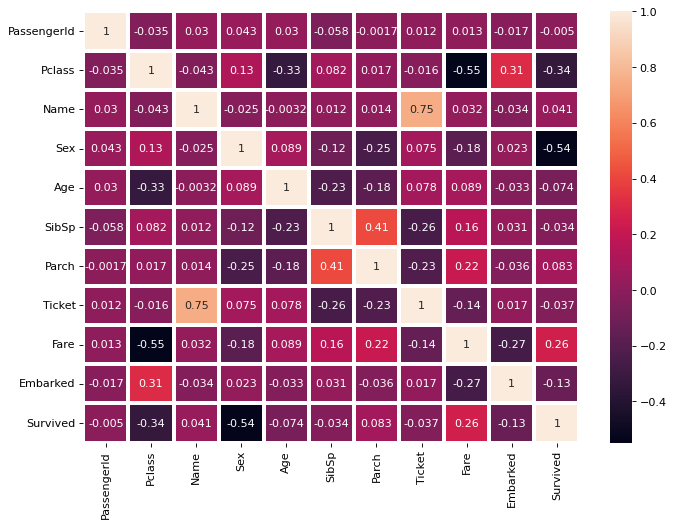

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [14]:
llindar = 0.05

correlacions = df.corr()["Survived"]
seleccionades = correlacions[correlacions.abs() > llindar].index
df = df[seleccionades]
df

,Pclass,Sex,Age,Parch,Fare,Embarked,Survived
0,1.0000,0.0000,0.3676,0.3333,0.0298,0.0000,0.0000
1,0.5000,1.0000,0.3843,0.0000,0.0205,0.5000,0.0000
2,0.5000,1.0000,0.3843,0.1667,0.0722,0.0000,0.0000
3,1.0000,1.0000,0.2460,0.0000,0.0078,0.0000,0.0000
4,1.0000,1.0000,0.2586,0.0000,0.0142,0.5000,0.0000
...,...,...,...,...,...,...,...
884,1.0000,0.0000,0.1581,0.0000,0.0141,0.0000,1.0000
885,1.0000,1.0000,0.3656,0.0000,0.0157,0.5000,0.0000
886,0.0000,0.0000,0.3843,0.0000,0.2211,0.0000,1.0000
887,1.0000,1.0000,0.2837,0.0000,0.0153,0.5000,0.0000


In [15]:
# Tornem a separar les dades en el dos conjunts
train = df[:n_train]
test = df[n_train:]

y_train = train["Survived"]
X_train = train.drop("Survived", axis="columns")

y_test = test["Survived"]
X_test = test.drop("Survived", axis="columns")

Tornem a mostrar  correlacions però després del pre-tractament, on queden aixì:

<Axes: >

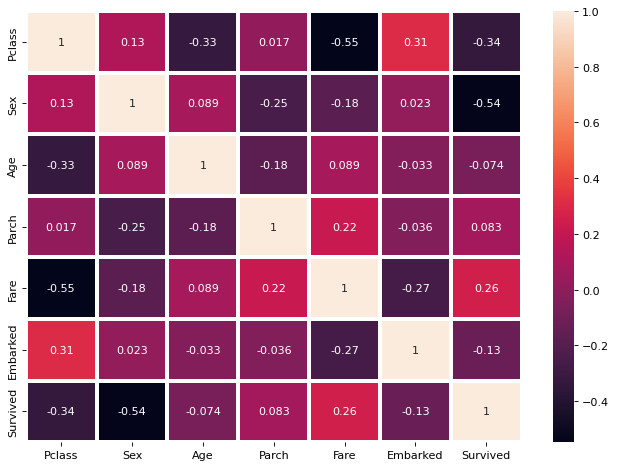

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

### 3. Selecció de mètriques – **1.5 punts**

En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)).  

Per començar, entreneu una **regressió logística** (no cal separar *train-test*). A partir d’aquesta, genereu una sèrie de funcions per analitzar els resultats. Aquestes funcions serviran més endavant.  

També caldrà triar la mètrica que farem servir posteriorment per escollir el millor model.  

**Preguntes:**  
-  A teoria hem vist el comportament de l’`accuracy_score` en dades no balancejades. Quina de les següents mètriques creieu que és més adequada pel vostre problema? Justifiqueu-ho.  
   - `accuracy_score`  
   - `f1_score`  
   - `average_precision_score`  



En aquest apartat, decidirem les mètriques i mecanismes adequats per a analitzar el rendiment del nostre model final.

Definim algunes funcions que ens seran útils per a l'anàlisi dels resultats:

-  Abans d’entrenar models, genereu una suite de funcions per analitzar gràficament el rendiment.  
   -  Mostreu la *Precision-Recall Curve* i la *ROC Curve*.  
   -  Quina és més rellevant per al vostre dataset?  
   -  Expliqueu amb les vostres paraules la diferència entre ambdues. [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)


-  Què mostra el [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)?  
   -  Quina mètrica triareu per optimitzar la classificació en el vostre cas?  

> **Nota:** En aquest apartat **no es valoren els resultats obtinguts**. El que s’avalua és:  
> - L’elecció raonada de la mètrica de classificació.  
> - Saber quines gràfiques cal generar per analitzar els resultats.  
>   
> Recordeu: abans de solucionar un problema cal tenir molt clara la mètrica d’error que s’utilitzarà, i aquesta decisió s’ha de prendre **abans d’entrenar models**.  

In [17]:
# Declaració de funcions per analitzar les funcions de les mètriques:
def calculMetriques(y_true, y_pred, metric='accuracy'):
    if metric == 'accuracy':
        result = accuracy_score(y_true,y_pred)
    elif metric == 'f1':
        result = f1_score(y_true,y_pred)
    elif metric == 'average_precision':
        result = average_precision_score(y_true,y_pred)
    elif metric == 'precision':
        result = precision_score(y_true,y_pred)
    elif metric == 'recall':
        result = recall_score(y_true,y_pred)
    else:
        raise ValueError("Métrica no reconocida")

    return result

In [18]:
# Declaració funcions per dibuixar les corbes
# Corba ROC
def mostra_corba_ROC(y_test, probs):
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_roc = auc(fpr, tpr)

    plt.scatter(fpr, tpr)
    plt.title(f'ROC curve. AUC {round(auc_roc, 2)}')
    plt.xlabel('Taxa de falsos positius (FPR)')
    plt.ylabel('Taxa de vertaders positius (TPR)')
    plt.show()

#Corba Precision-Recall
def mostra_corba_PR(y_test, probs):
    prec, rec, _ = precision_recall_curve(y_test, probs)
    auc_pr = auc(rec, prec)

    plt.scatter(prec, rec)
    plt.title(f'PR curve. AUC {round(auc_pr, 2)}')
    plt.xlabel('Precisió')
    plt.ylabel('Recall')
    plt.show()

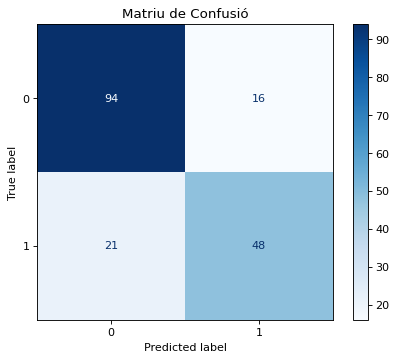

Mètriques: 

 Accuracy: 0.7932960893854749
 Precision: 0.75
 Recall: 0.6956521739130435
 F1: 0.7218045112781954
 Average_precision: 0.6390575661889726


,precision,recall,f1-score,support
0.0,0.8174,0.8545,0.8356,110.0000
1.0,0.7500,0.6957,0.7218,69.0000
accuracy,0.7933,0.7933,0.7933,0.7933
macro avg,0.7837,0.7751,0.7787,179.0000
weighted avg,0.7914,0.7933,0.7917,179.0000


In [19]:
# Entrenament del model
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
probs = model.predict_proba(X_test)[:,1]

# Dibuix de la matriu de confusió
conf_mat = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap='Blues')
plt.title("Matriu de Confusió")
plt.show()

# Cridas a la funció de càlcul de mètriques
print("Mètriques: \n")
print(" Accuracy:", calculMetriques(y_test,predictions, metric="accuracy"))
print(" Precision:", calculMetriques(y_test,predictions, metric="precision"))
print(" Recall:", calculMetriques(y_test,predictions, metric="recall"))
print(" F1:", calculMetriques(y_test,predictions, metric="f1"))
print(" Average_precision:", calculMetriques(y_test,predictions, metric="average_precision"))

# Generació de taula de classification_report
Class_report = classification_report(y_test, predictions, output_dict=True)
Class_report_df = pd.DataFrame(Class_report).transpose()
Class_report_df

El classification_report ens mostra una taula de les mètriques principals del model de classificació, per a cada classe del conjunt de test. La taula està formada per 4 columnes:
- **Precision**: ens indica quina proporció de les prediccions positives són correctes
- **Recall**: ens indica quina proporció dels supervivents reals han sigut identificats correctament
- **F1-score**: mitjana entre precisió i recall
- **Support**: Nombre d'exemples reals de cada classe

Observant la columna de 'Support' podem veure que la quantitat de mostres de la classe 0, és a dir, de no supervivents és considerablement més gran que la quantitat de mostres de la classe 1 (sobrevivents). Numèricament, podem observar que de totes les mostres que tenim la classe de no supervivents representa el 61,5%, per tant, podem considerar que ens trobem davant d'un conjunt de dades desbalancejat.

**Avaluació de les possibles mètriques:**

- **Accuracy**: <span style="color: red">X </span>

$Accuracy=\frac{TP+TN}{TP+TN+FN+FP}$

Retorna el percentatge de prediccions correctes sobre el total.
En el cas del Dataset del Titanic, on hem pogut observar que està desequilibrat perquè el nombre de persones que no sobreviuen és més alt del que si ho fan, aquesta mètrica no ens aporta informació rellevant. Un model que sempre prediu "no sobreviu" tindria un alt accuracy, però realment el nostre model no estaria classificant bé.

- **Precision**: <span style="color: green">✓</span>

$Precision=\frac{TP}{TP+FP}$

Retorna la proporció del nombre de prediccions positives que realment són correctes, és a dir, ens dona informació sobre la fiabilitat del nostre model quan diu que algú sobreviu. Serà de gran ajuda aquesta mètrica per saber si el model està sobreestimant falsos positius, és a dir, que està predient que algú sobreviu quan realment no ho va fer.

- **Recall**: <span style="color: green">✓</span>

$Recall=\frac{TP}{TP+FN}$

Retorna la proporció del nombre de casos positius que el model detecta correctament, és a dir, ens dona informació sobre la capacitat del nostre model d'identificar els supervivents reals. En el cas del Titanic on la quantitat de no sobrevivents és major podem considerar més greu que el nostre model no identifiqui un supervivent que el model classifiqui algú com a supervivent, per tant, aquesta mètrica serà de gran ajuda.

- **F1**: <span style="color: green">✓</span>

$F1=2*\frac{Precision*Recall}{Precision+Recall}$

Ens mostra l'equilibri entre les mètriques: Precision i Recall. Aquesta mètrica ens ajuda a reflectir l'equilibri entre encerts i omissions en datasets desbalancejats com la de Titanic. Aquesta mètrica ens serà de gran ajuda perquè ens ajuda a veure com el model és comportar amb la identificació d'aquesta classe minoritària (classe 1: 'sobreviu').

- **Average Precision**: <span style="color: green">✓</span><span style="color: red">X </span>


Retorna la mitjana de la Precision en tots els nivells de recall. Dit amb unes altres paraules, a mesura que el nostre model detecta casos positius mesura com de bé manté la precisió. Aquesta mètrica ens aporta informació, però en el nostre cas que ens interessa prendre decisions concretes, com "sobreviu" o "no sobreviu" ens fixarem més en la mètrica d'F1.

**Diferencies entre les 2 curves i quina es la més rellevant pel dataset de Titanic** 

En el cas de la ROC Curve mesura la capacitat del model per distingir entre classes, és a dir, com de bé separa les classes el nostre model. Normalment en escenaris de Dataset on les dades estan balancejades és un gràfic rellevant per avaluar el grau de discriminació del model.

Per altra banda, Precision-Recall Curve mesura l'equilibri entre quants positius prediu correctament i quina proporció dels positius predits són realment correctes, és a dir, com de bé el nostre model detecta la classe positiva. A diferència de la ROC Curve en classes desequilibrades, com per exemple, en el cas de la columna Survive del dataset de Titanic on la majoria dels passatgers van morir té més rellevància.


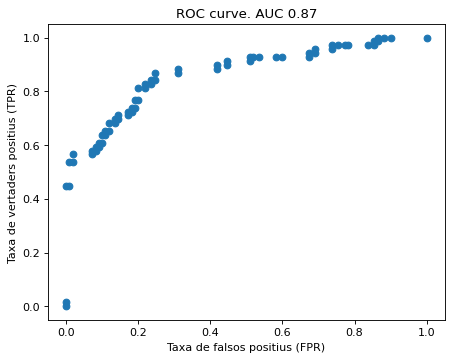

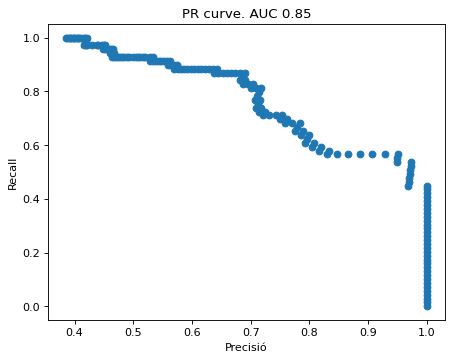

In [20]:
mostra_corba_ROC(y_test, probs)
mostra_corba_PR(y_test, probs)

Una vegada definides les 2 corbes arribem a la conclusió que la Precision-Recall Curve és la que més s'ajusta al nostre dataset de Titanic. Creiem que és aquesta, ja que sabem que al Titanic la quantitat de sobreviscuts és menor a la quantitat de morts, per tant, ens trobem davant un dataset desequilibrat i aquesta corba ens permetrà saber si realment el model està identificant bé els supervivents.

### 4. Selecció de models amb validació creuada – **4 punts**

Fent servir la mètrica seleccionada a l’apartat anterior, cal escollir una sèrie de models i, mitjançant **validació creuada**, seleccionar el millor model amb els seus hiperparàmetres òptims, trobats a través d’una cerca (*hyperparameter search*).  

Aquesta tasca s’emmarca dins de l’aprenentatge computacional **supervisat**.  
A *scikit-learn* disposem de diverses tècniques ([documentació](https://scikit-learn.org/stable/supervised_learning.html)). A classe hem vist tècniques com:  
- Regressió logística  
- SVM amb diferents *kernels*  
- K-Nearest Neighbours (KNN)  
- Arbres de decisió  
- Random Forest  
- Gradient Boosting  

Per aquest apartat es demana seleccionar **un mínim de 4 models** (per exemple: regressió logística, random forest, KNN, SVM).  

**Preguntes:**  
-  Quins models heu considerat? Per què els heu seleccionat? 
    Per a la tasca de classificació supervisada s’han seleccionat els següents models: Regressió Logística, K-Nearest Neighbours (KNN), Support Vector Machine (SVM) i Random Forest, ampliats amb Decision Tree, SGDClassifier i AdaBoostClassifier per enriquir la comparativa.
    La selecció respon a la voluntat d’avaluar models lineals i no lineals amb diferents característiques:
    * La Regressió Logística és un model lineal senzill i interpretatiu que serveix com a base de referència.

    * El KNN permet captar relacions no lineals i depèn fortament de la distància entre mostres.

    * El SVM és eficaç en espais de dimensions elevades i amb kernels diversos pot modelar fronteres complexes.

    * Els arbres de decisió i els Random Forests capturen relacions no lineals i interaccions entre variables de manera automàtica.

    * L’AdaBoost introdueix tècniques d’aprenentatge en conjunt (ensemble learning), ponderant models febles per millorar el rendiment global.




-  Fent servir validació creuada, escolliu el millor model (amb hiperparàmetres per defecte).  
   -  Per què és important fer servir validació creuada?  
      La validació creuada és essencial per obtenir una estimació fiable del rendiment del model i reduir la dependència de la partició de les dades. A diferència d’una simple divisió train/test, la cross-validation proporciona una mitjana de rendiment sobre diverses particions, evitant així conclusions esbiaixades degudes a un conjunt de validació poc representatiu.

      S’ha emprat RepeatedStratifiedKFold, amb n_splits = 10 i n_repeats = 10, per assegurar un repartiment equilibrat del target en cada iteració i obtenir una mitjana robusta dels resultats.

      
   -  Heu de fer servir algun [tipus específic de validació creuada](https://scikit-learn.org/stable/modules/cross_validation.html)?

      S’ha optat per StratifiedKFold per mantenir la proporció de classes en tots els conjunts, característica fonamental en problemes de classificació. Posteriorment, s’ha ampliat amb RepeatedStratifiedKFold per reduir la variabilitat associada a l’aleatorietat de les divisions.
      


  
-  Seleccioneu un conjunt d’**hiperparàmetres** a provar per a cada model i realitzeu la cerca corresponent.  
   -  Hi ha algun model que es pugui descartar de primeres? Per què?  
      
      Inicialment, s’ha emprat un GridSearchCV() per comparar els models amb els seus paràmetres per defecte, emprant la mètrica F1-score com a criteri d’avaluació. Els resultats inicials han mostrat que el Random Forest obtenia el valor més alt de F1.

      Per optimitzar els hiperparàmetres, s’ha aplicat BayesSearchCV(), que realitza una cerca bayesiana guiada per models probabilístics per reduir el cost computacional de l’exploració exhaustiva. Aquesta tècnica resulta molt més eficient que el grid search, especialment quan l’espai d’hiperparàmetres és ampli.

      Els hiperparàmetres ajustats per a cada model inclouen:

      * **Regressió Logística:** paràmetre C

      * **SGDClassifier:** alpha, max_iter

      * **KNN:** n_neighbors

      * **SVM:** C, kernel

      * **Decision Tree:** max_depth

      * **Random Forest:** criterion, n_estimators, max_depth

      * **AdaBoost:** n_estimators

      Determinats models, com SGDClassifier, han estat descartats en fases preliminars per mostrar rendiments inferiors i alta sensibilitat a la inicialització.

-  Mostreu els resultats en una taula amb: model, experiments realitzats, resultats (train i test) i, opcionalment, temps d’entrenament.  
    Els resultats de la validació creuada mostren que el Random Forest és el model amb millor rendiment mitjà, amb els hiperparàmetres òptims següents:

    | Model         | max_depth | criterion | n_estimators | F1-score                          |
    |----------------|------------|------------|---------------|------------------------------------|
    | Random Forest  | 9          | log_loss   | 80            | **0.91** (mitjana sobre 10 repeticions) |


-  Quin tipus de **K-fold** heu escollit per a la selecció de models i per a la selecció amb hiperparàmetres?  
   -  Com afecta el nombre de folds al resultat final?  
   
   S’ha emprat un esquema de 10 K-Folds, repetit 10 vegades. Augmentar el nombre de folds sol millorar l’estimació del rendiment (menor biaix) però també incrementa el cost computacional. El valor de 10 representa un compromís adequat entre precisió i temps de càlcul.

-  Quines formes de buscar el millor paràmetre heu trobat?  
   -  Són costoses computacionalment?  
   -  [Documentació *Grid Search*](https://scikit-learn.org/stable/modules/grid_search.html)  
   -  Quina heu seleccionat?  

   S’han avaluat tres estratègies de cerca d’hiperparàmetres:

   * Grid Search: exhaustiva però molt costosa.

   * Random Search: més eficient, però pot ignorar regions òptimes de l’espai.

   * Bayesian Optimization (BayesSearchCV): dirigeix la cerca cap a àrees prometedores, minimitzant iteracions innecessàries.

   El mètode BayesSearchCV ha estat seleccionat per oferir el millor equilibri entre eficiència i rendiment final dins de les limitacions temporals disponibles.

-  Si disposem de recursos limitats (per exemple, un PC durant 1 hora), quin mètode creieu que donarà millor resultat final?  
    
    En entorns amb recursos computacionals limitats (per exemple, un PC durant una hora), el Random Search pot oferir bons resultats amb un cost inferior, mentre que el Grid Search és desaconsellable. En canvi, el Bayesian Search és preferible si es disposa d’una implementació optimitzada i un conjunt de paràmetres ben acotat.

    Finalment, s’ha constatat que la repetició dels experiments mitjançant Repeated Stratified K-Fold permet obtenir resultats més estables i coherents, confirmant la solidesa del model seleccionat

-  Existeixen mètodes de cerca més eficients? ([scikit-optimize](https://scikit-optimize.github.io/stable/))  
    
    Sí. A més de Grid Search i Random Search, existeixen mètodes més eficients per optimitzar hiperparàmetres:

    * Optimització Bayesiana (p. ex., BayesSearchCV de scikit-optimize): modela la funció objectiu (p. ex., F1 mitjana CV) i decideix les següents mostres on la millora esperada és major. Sol convergir amb menys avaluacions que grid o random.

    * Successive Halving / Hyperband (HalvingGridSearchCV, HalvingRandomSearchCV a scikit-learn): avaluen molts candidats amb pocs recursos (p. ex., menys iteracions, menys dades) i promocionen només els millors a etapes amb més recursos. Molt eficients quan el cost escala amb el recurs.

    * BOHB / ASHA (var. de Hyperband amb prioritats bayesianes o asynchronous halving): milloren l’eficiència en entorns paral·lels.

    * TPE (Tree-structured Parzen Estimator) (p. ex., Hyperopt, Optuna): alternativa a la bayesiana clàssica, sovint molt competitiva en espais discrets/mixed.

    Per altra banda, a nivell de **Cost computacional**:

    * Grid és exhaustiu i habitualment el més car.

    * Random és lineal amb n_iter i acostuma a trobar bones solucions ràpidament, tot i que sense garanties.

    * Bayesiana/TPE redueix avaluacions inútils, però cada iteració té cost d’actualitzar el model (menor que entrenar un bosc aleatori, però existent).

    * Hyperband/SH és excel·lent quan podem definir un recurs progressiu (èpoques, mostra de dades, arbres, etc.).

# Procediment i plantejament continuat

En aquest apartat seleccionarem **els millors models per classificar les nostres dades** fent servir *cross-validation*.  

On la *cross-validation* és una estratègia fonamental, ja que ens permet **avaluar els models de manera més precisa** eliminant el factor de sort en dividir el conjunt de dades entre entrenament i validació. En el nostre cas, es divideixen les dades en `n_splits = 10` conjunts diferents, cadascun dels quals s’utilitza com a validació en una de les 10 iteracions d’entrenament (amb la resta de dades com a *training*). Els resultats finals corresponen a la **mitjana** d’aquests entrenaments.

A més, per evitar que les dades de validació siguin desbalancejades respecte al *target* —i així eliminar de nou el component aleatori— podem utilitzar `StratifiedKFold()`, que **reparteix les dades equilibradament** segons la variable objectiu. D’aquesta manera, evitem conjunts de validació com el de test de l’apartat anterior, que podrien afectar negativament els resultats.

> ⚠️ **WARNING** ⚠️ Molts estimadors incorporen **inicialitzacions o components aleatoris** (com el *Random Forest*), fet que dificulta mantenir comparacions coherents entre execucions.  
> Per aquest motiu, utilitzarem `RepeatedStratifiedKFold()`, que **repeteix tot el procés `n_repeats = 10` vegades** i ens calcula la mitjana, aconseguint una estimació més estable i fiable.

En primer lloc, aplicarem un `GridSearchCV()` amb **diferents tipus d’estimadors**, cadascun amb els seus **paràmetres per defecte**, per determinar quins models ofereixen els millors resultats.

In [21]:
pipe = Pipeline([('estimator', 'passthrough')])

param_grid = [
    {'estimator': [LogisticRegression()]},
    {'estimator': [SGDClassifier()]},
    {'estimator': [KNeighborsClassifier()]},
    {'estimator': [SVC()]},
    {'estimator': [DecisionTreeClassifier()]},
    {'estimator': [RandomForestClassifier()]},
    {'estimator': [AdaBoostClassifier()]}
]

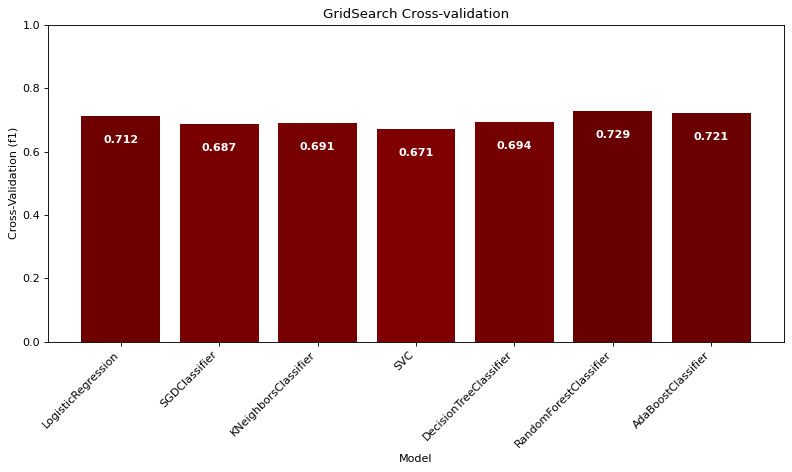

Millor Estimador: Pipeline(steps=[('estimator', RandomForestClassifier())])
Millor valor: 0.7285


In [22]:

repeated_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
grid_search = GridSearchCV(pipe, param_grid, scoring='f1', cv=repeated_kfold)
grid_search.fit(X_train, y_train)

def mostra_GridSearchCV(grid_search):
    results = grid_search.cv_results_

    estimator_names = [str(params['estimator']).split('(')[0] for params in results['params']]
    mean_scores = results['mean_test_score']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(estimator_names, mean_scores, color=gist_heat_r(mean_scores))

    plt.ylim(0, 1)
    plt.title('GridSearch Cross-validation')
    plt.xlabel('Model')
    plt.ylabel('Cross-Validation ('+grid_search.scoring+')')

    for bar, score in zip(bars, mean_scores):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.06, f"{yval:.3f}", 
                 ha='center', va='top', color='white', fontweight='bold')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("Millor Estimador:", grid_search.best_estimator_)
    print(f"Millor valor: {grid_search.best_score_:.4f}")


mostra_GridSearchCV(grid_search)

Els resultats obtinguts mostren que, amb els paràmetres predeterminats, el classificador que aconsegueix el millor valor de la mètrica F1 és el RandomForestClassifier.

A continuació, procedirem a optimitzar els models ajustant els seus hiperparàmetres.

⚠️ **WARNING** ⚠️ La cerca dels valors òptims dels hiperparàmetres pot resultar computacionalment molt costosa, ja que implica explorar totes les combinacions possibles dins l’espai de paràmetres.
Per reduir aquest temps de càlcul, farem servir la funció BayesSearchCV(), que aplica un model probabilístic per orientar la cerca cap a les àrees més prometedores de l’espai d’hiperparàmetres. Aquesta estratègia és molt més eficient que la GridSearchCV, la qual explora de manera exhaustiva totes les combinacions possibles.

In [23]:
repeated_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

pipe = Pipeline([('estimator', 'passthrough')])

param_grid = [
    {'estimator': [LogisticRegression()],
     'estimator__C': Real(0.01, 100, prior='log-uniform')},
    {'estimator': [SGDClassifier()],
     'estimator__alpha': Real(0.0001, 0.1, prior='log-uniform'),
     'estimator__max_iter': Integer(500, 5000)},
    {'estimator': [KNeighborsClassifier()],
     'estimator__n_neighbors': Integer(1, 15)},
    {'estimator': [SVC()],
     'estimator__C': Real(0.01, 100, prior='log-uniform'),
     'estimator__kernel': Categorical(['linear', 'rbf'])},
    {'estimator': [DecisionTreeClassifier()],
     'estimator__max_depth': Integer(1, 20)},
    {'estimator': [RandomForestClassifier()],
     'estimator__criterion': Categorical(['gini', 'entropy', 'log_loss']),
     'estimator__n_estimators': Integer(80, 220),
     'estimator__max_depth': Integer(1, 20)},
    {'estimator': [AdaBoostClassifier()],
     'estimator__n_estimators': Integer(80, 220)}
]

search = BayesSearchCV(
    estimator=pipe,
    search_spaces=param_grid,
    cv=repeated_kfold,
    n_jobs=-1,
    scoring='f1'
)

In [28]:
search.fit(X_train, y_train)

,estimator,Pipeline(step...assthrough')])
,search_spaces,"[{'estimator': [LogisticRegression()], 'estimator__C': Real(low=0.01...m='normalize')}, {'estimator': [SGDClassifier()], 'estimator__alpha': Real(low=0.00...m='normalize'), 'estimator__max_iter': Integer(low=5...m='normalize')}, ...]"
,optimizer_kwargs,None
,n_iter,50
,scoring,'f1'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,RepeatedStrat...om_state=None)


In [29]:
results = search.cv_results_
resultats = pd.DataFrame({
    'Model': [', '.join([f"{key.replace('estimator__', '')}: {value}" for key, value in params.items()]) for params in results['params']],
    'Score': results['mean_test_score'],
    'Temps': results['mean_fit_time'] 
})

pd.set_option('display.max_colwidth', None)
resultats = resultats.sort_values(by='Score', ascending=False).reset_index(drop=True)
resultats

,Model,Score,Temps
0,"estimator: RandomForestClassifier(), criterion: log_loss, max_depth: 12, n_estimators: 220",0.7516,0.6085
1,"estimator: RandomForestClassifier(), criterion: log_loss, max_depth: 11, n_estimators: 220",0.7515,0.6250
2,"estimator: RandomForestClassifier(), criterion: entropy, max_depth: 11, n_estimators: 220",0.7510,0.5709
3,"estimator: RandomForestClassifier(), criterion: entropy, max_depth: 9, n_estimators: 220",0.7504,0.5956
4,"estimator: RandomForestClassifier(), criterion: log_loss, max_depth: 9, n_estimators: 219",0.7483,0.6401
...,...,...,...
345,"estimator: SVC(), C: 0.01, kernel: linear",0.5980,0.0102
346,"estimator: SVC(), C: 0.012825672847547593, kernel: rbf",0.5939,0.0174
347,"estimator: RandomForestClassifier(), criterion: log_loss, max_depth: 1, n_estimators: 218",0.5924,0.4831
348,"estimator: RandomForestClassifier(), criterion: gini, max_depth: 1, n_estimators: 82",0.5893,0.1735


Cal recordar que el millor estimador pot variar lleugerament entre execucions, atès que el procés d’entrenament incorpora inicialitzacions i decisions aleatòries.
Per tal d’obtenir una mesura més estable i representativa del rendiment, s’ha optat per repetir el procediment de validació creuada deu vegades i calcular-ne la mitjana dels resultats.

A més, s’ha observat que els classificadors òptims obtinguts presenten valors d’hiperparàmetres molt similars, fet que suggereix que la cerca ha convergit cap a una combinació de paràmetres robusta i coherent.

Com a resultat final, el model seleccionat és el següent:

#### **Random Forest**

| PARAM    |  max_depth     | criterion     | n_estimators     | 
|----------|----------------|---------------|------------------|
| VALUE    | 9              | log_loss      | 80               |



### 5. Anàlisi final – **1.5 punts**

Un cop seleccionat el millor model amb els hiperparàmetres òptims, cal elaborar un **report final** amb els resultats obtinguts.  

**Preguntes:**  
-  Mostreu les corbes ROC/PR (la que hàgiu escollit a l’apartat 3) i interpreteu els resultats.  


-  Analitzeu en detall les diferents mètriques que considereu adients.   


A continuació, avaluarem el millor model trobat i obtindrem les probabilitats per a les corbes ROC i PR per finalment mostrar les metriques i corbes amb la funcio **mostra_resultats_finals()**

MÈTRIQUES:
Accuracy: 0.860
Precision: 0.893
Recall: 0.725
F1-score: 0.800
Average Precision (AUC PR): 0.842


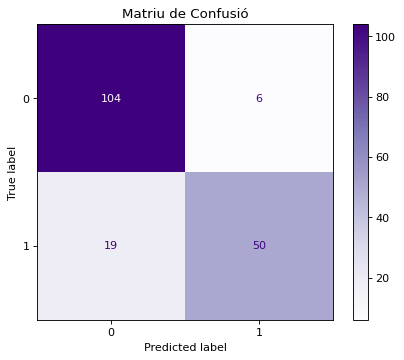

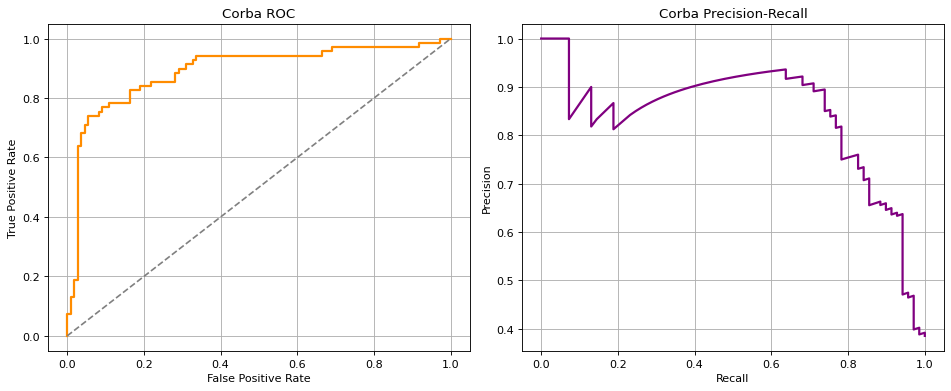


Millor llindar trobat segons la corba PR: 0.443

Resultats amb el llindar òptim:
MÈTRIQUES:
Accuracy: 0.849
Precision: 0.839
Recall: 0.754
F1-score: 0.794
Average Precision (AUC PR): 0.842


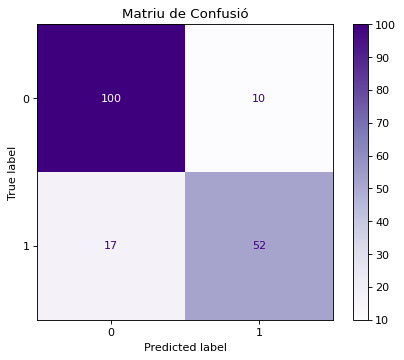

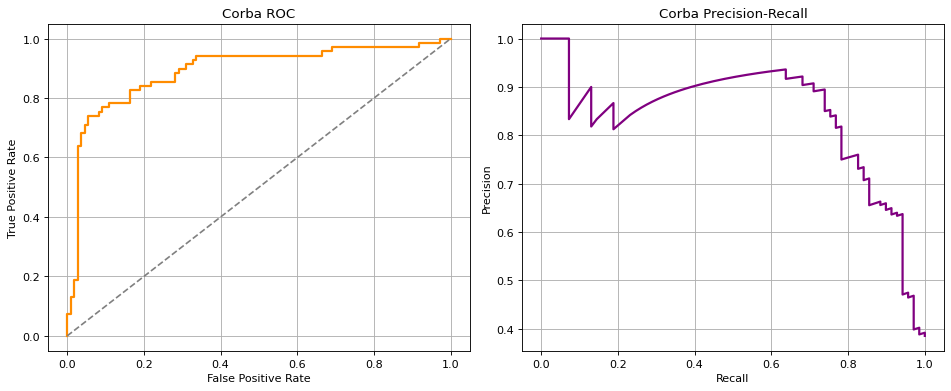

In [31]:

best_model = search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

#probabilitats per a les corbes ROC i PR
if hasattr(best_model, "predict_proba"):
    y_probs = best_model.predict_proba(X_test)[:, 1]
else:
    y_probs = best_model.decision_function(X_test)


def mostra_resultats_finals(y_test, y_pred, y_probs):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    avg_prec = average_precision_score(y_test, y_probs)

    print("MÈTRIQUES:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Average Precision (AUC PR): {avg_prec:.3f}")

    #matriu de confusió
    conf_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    disp.plot(cmap="Purples")
    plt.title("Matriu de Confusió")
    plt.show()

    #corbes ROC i PR
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    precision, recall, _ = precision_recall_curve(y_test, y_probs)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0,1], [0,1], linestyle='--', color='grey')
    plt.title("Corba ROC")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(recall, precision, color='purple', lw=2)
    plt.title("Corba Precision-Recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


mostra_resultats_finals(y_test, y_pred, y_probs)


precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
distances = np.sqrt((1 - recall)**2 + (1 - precision)**2)
best_index = np.argmin(distances)
best_threshold = thresholds[best_index]

print(f"\nMillor llindar trobat segons la corba PR: {best_threshold:.3f}")

# Tornem a calcular les prediccions amb el millor llindar
y_pred_opt = (y_probs > best_threshold).astype(int)

# Tornem a mostrar les mètriques amb el nou llindar
print("\nResultats amb el llindar òptim:")
mostra_resultats_finals(y_test, y_pred_opt, y_probs)


El model seleccionat automàticament amb **BayesSearchCV** és el que ha obtingut la millor puntuació de F1-score durant la validació creuada.
Després d’entrenar-lo amb el conjunt complet d’entrenament, els resultats sobre el conjunt de test mostren un bon equilibri entre precisió i sensibilitat.

- Accuracy: indica el percentatge total de prediccions correctes.

- Precision: mostra quina proporció dels passatgers que el model prediu com a supervivents ho són realment.

- Recall: mesura quants supervivents reals ha estat capaç d’identificar el model.

- F1-score: combina precisió i recall, útil quan les classes no estan equilibrades.

- Average Precision (AUC PR): reflecteix la qualitat global de la corba Precision-Recall, especialment rellevant en conjunts desbalancejats com aquest.

Pel que fa a les corbes, observem:

- La corba ROC presenta un AUC alt, la qual cosa indica bona separació entre supervivents i no supervivents.

- La corba Precision-Recall mostra un comportament consistent, amb una bona precisió fins a nivells mitjans de recall, aixó resulta en una bona capacitat de detecció.

La **matriu de confusió** mostra un balanç raonable entre falsos positius i falsos negatius.
En conjunt, el model aconsegueix un rendiment sòlid i coherent amb les dades disponibles.
Tot i que es podria millorar amb més mostres o característiques addicionals, els resultats són satisfactoris per una primera aproximació al problema de predir la supervivència dels passatgers del Titanic.

- Comentar breument com podríeu aplicar aquest model en un futur (cas d’ús). 

Pensem que el model que hem creat per a classificar les dades, en aquest cas de supervivents al Titanic, podria servir per analitzar patrons de comportament i factors de risc en situacions d’emergència. Ajudant així a dissenyar protocols més eficients. 

Per exemple, en l’àmbit del transport marítim o aeri, es podrien crear sistemes que avaluïn el nivell de vulnerabilitat dels passatgers segons característiques com l’edat, el sexe o la ubicació dins del vehicle. A partir d’això, es podrien optimitzar plans d’evacuació o assignacions de recursos d'emergencia. 


-  Quines possibles millores es podrien fer al vostre model?  

Tot i que el model actual mostra un rendiment adequat, encara hi ha certs punts on hi podem aplicar certes millores, unes de les millores que pensaem que podrien millor-lo són: 

- Ampliació de dades: el conjunt de dades del Titanic es limitat, afegir més informació (com per exemple detalls de la ubicació de cabines) podria ajudar al model a detectar patrons més complexos i realistes.

- Avaluació amb més metriques: En problemes de classificació amb classes desequilibrades, pot ser interessant explorar atres mètriques que ens resultin més utils. 

En resum, el model aconsegueix resultats sòlids amb les dades disponibles, però el seu potencial podria créixer amb més informació i una anàlisi més profunda de les variables rellevants.